### Importing relevant libraries

In [172]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import imutils

### Reading Image

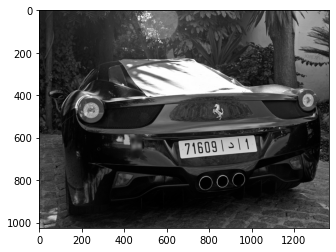

In [206]:
img = cv2.imread('image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Noise reduction and edge detection

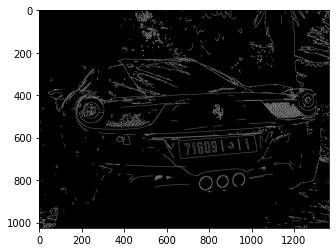

In [207]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 120, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Finding the plate and applying contour

In [208]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [209]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [210]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

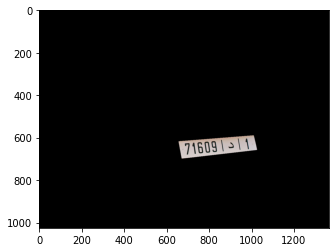

In [211]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [163]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped = gray[x1:x2+1, y1:y2+1]

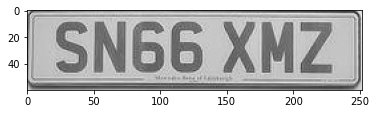

In [164]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

### Read text from the number plate

In [167]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [168]:
result = reader.readtext(cropped)
result

[([[16, 2], [238, 2], [238, 56], [16, 56]], 'SN66 XMZ', 0.8657252044691898)]

### Showing Results

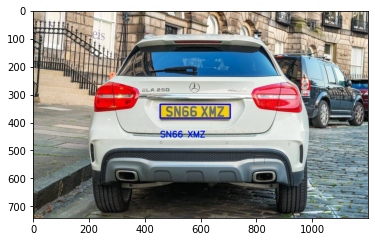

In [171]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))